# ARIMA模型

In [5]:
import pandas as pd
from datetime import datetime

In [79]:
df = pd.read_csv('./data/T1812_data.csv',index_col = 'DATE',encoding='utf-8', usecols=['DATE','CLOSE'])
df.index = pd.to_datetime(df.index)
close1 = df['CLOSE']  #转换为series
#close = close1[:'2018-09']
print(close)
print(close.head())
close.head().index

DATE
2018-07-11 09:20:00    95.750
2018-07-11 09:25:00    95.785
2018-07-11 09:30:00    95.800
2018-07-11 09:35:00    95.790
2018-07-11 09:40:00    95.780
2018-07-11 09:45:00    95.750
2018-07-11 09:50:00    95.745
2018-07-11 09:55:00    95.690
2018-07-11 10:00:00    95.690
2018-07-11 10:05:00    95.690
2018-07-11 10:10:00    95.690
2018-07-11 10:15:00    95.690
2018-07-11 10:20:00    95.690
2018-07-11 10:25:00    95.690
2018-07-11 10:30:00    95.690
2018-07-11 10:35:00    95.670
2018-07-11 10:40:00    95.670
2018-07-11 10:45:00    95.670
2018-07-11 10:50:00    95.670
2018-07-11 10:55:00    95.700
2018-07-11 11:00:00    95.715
2018-07-11 11:05:00    95.715
2018-07-11 11:10:00    95.670
2018-07-11 11:15:00    95.670
2018-07-11 11:20:00    95.650
2018-07-11 11:25:00    95.650
2018-07-11 11:30:00    95.650
2018-07-11 13:05:00    95.680
2018-07-11 13:10:00    95.680
2018-07-11 13:15:00    95.720
                        ...  
2018-09-28 11:20:00    94.730
2018-09-28 11:25:00    94.700
2018-

DatetimeIndex(['2018-07-11 09:20:00', '2018-07-11 09:25:00',
               '2018-07-11 09:30:00', '2018-07-11 09:35:00',
               '2018-07-11 09:40:00'],
              dtype='datetime64[ns]', name=u'DATE', freq=None)

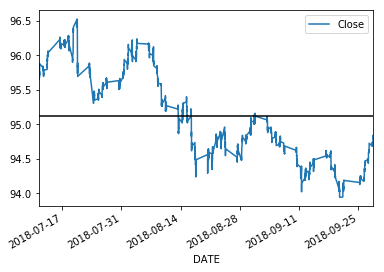

In [80]:
import matplotlib.pylab as plt
close.plot()
plt.axhline(close.mean(), color = 'black')
plt.legend(['Close'])

AD test: Here the null hypothesis is that the TS is non-stationary.

In [81]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

Test Statistic                   -1.379811
p-value                           0.591916
#Lags Used                        0.000000
Number of Observations Used    3077.000000
Critical Value (5%)              -2.862480
Critical Value (1%)              -3.432477
Critical Value (10%)             -2.567270
dtype: float64


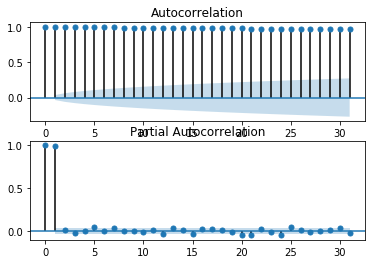

In [82]:
score = testStationarity(close)
print(score)
draw_acf_pacf(close,1)

在一阶拆分后p值很小 所以相当于平稳

Test Statistic                  -56.152461
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    3076.000000
Critical Value (5%)              -2.862480
Critical Value (1%)              -3.432478
Critical Value (10%)             -2.567270
dtype: float64


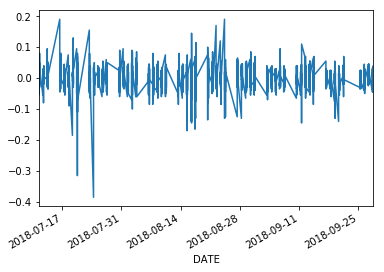

In [83]:
diff_1 = close.diff(1)
diff_1.dropna(inplace=True)
score = testStationarity(diff_1)
print(score)
diff_1.plot()
plt.show()

In [84]:
rol_mean = diff_1.rolling(window=54).mean()  #每天
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
print(testStationarity(ts_diff_1))

Test Statistic                -1.010601e+01
p-value                        1.029504e-17
#Lags Used                     2.900000e+01
Number of Observations Used    2.993000e+03
Critical Value (5%)           -2.862506e+00
Critical Value (1%)           -3.432537e+00
Critical Value (10%)          -2.567284e+00
dtype: float64


In [85]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff_1, order=(1, 0)) 
result_arma = model.fit( disp=-1, method='css')

c:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [98]:
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = close.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)

# 移动平均还原
rol_sum = diff_1.rolling(window=54).sum()
rol_recover = diff_recover_1*55 - rol_sum.shift(1)
print(rol_recover)

DATE
2018-07-11 09:20:00            NaN
2018-07-11 09:25:00            NaN
2018-07-11 09:30:00            NaN
2018-07-11 09:35:00            NaN
2018-07-11 09:40:00            NaN
2018-07-11 09:45:00            NaN
2018-07-11 09:50:00            NaN
2018-07-11 09:55:00            NaN
2018-07-11 10:00:00            NaN
2018-07-11 10:05:00            NaN
2018-07-11 10:10:00            NaN
2018-07-11 10:15:00            NaN
2018-07-11 10:20:00            NaN
2018-07-11 10:25:00            NaN
2018-07-11 10:30:00            NaN
2018-07-11 10:35:00            NaN
2018-07-11 10:40:00            NaN
2018-07-11 10:45:00            NaN
2018-07-11 10:50:00            NaN
2018-07-11 10:55:00            NaN
2018-07-11 11:00:00            NaN
2018-07-11 11:05:00            NaN
2018-07-11 11:10:00            NaN
2018-07-11 11:15:00            NaN
2018-07-11 11:20:00            NaN
2018-07-11 11:25:00            NaN
2018-07-11 11:30:00            NaN
2018-07-11 13:05:00            NaN
2018-07-11 13:1

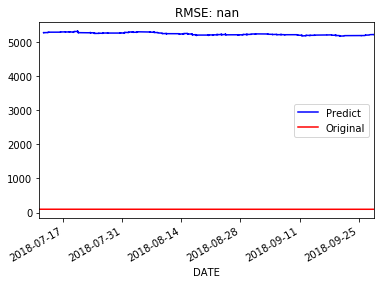

In [99]:
import numpy as np
ts = close[rol_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white')
rol_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((rol_recover-ts)**2)/ts.size))
plt.show()